In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
#Churn           : berlangganan, 0 (pelanggan yang melanjutkan layanan), 1 (pelanggan yang tidak melanjutkan layanan
#AccountWeeks    : jumlah akun pelanggan yang aktif dalam mingguan
#ContractRenewal : 0 (tidak memperbaharui kontrak), 1 (memperbaharui kontrak)
#DataPlan        : 0 (pelanggan tidak memiliki paket data), 1 (pelanggan memiliki paket data)
#DataUsage       : penggunaan data bulanan gigabytes
#CustServCalls   : jumlah panggilan ke CS
#DayMins         : Rata-rata menit penggunaan harian per bulan
#DayCalls        : Jumlah rata-rata panggilan harian
#MonthlyCharge   : Rata-rata pembayaran perbulan
#Overage free    : Biaya tambahan terbesar dalam 12 bulan terakhir

### EDA

In [5]:
#Korelasi antar kolom

In [6]:
df.corr('spearman')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.015583,-0.259852,-0.102148,-0.102080,0.136657,0.170677,0.026311,0.094655,0.088582,0.060850
AccountWeeks,0.015583,1.000000,-0.029538,0.008741,0.016805,-0.005942,0.017884,0.032690,0.011784,-0.007956,0.014761
ContractRenewal,-0.259852,-0.029538,1.000000,-0.006006,-0.010479,0.030328,-0.049604,-0.013043,-0.044644,-0.010400,-0.043836
DataPlan,-0.102148,0.008741,-0.006006,1.000000,0.841275,-0.022156,0.002989,-0.012653,0.695608,0.022762,-0.004484
DataUsage,-0.102080,0.016805,-0.010479,0.841275,1.000000,-0.017852,-0.004309,-0.019481,0.646449,0.011492,0.076597
CustServCalls,0.136657,-0.005942,0.030328,-0.022156,-0.017852,1.000000,-0.015032,-0.020957,-0.025401,-0.017801,-0.017374
DayMins,0.170677,0.017884,-0.049604,0.002989,-0.004309,-0.015032,1.000000,0.009391,0.598887,0.006401,-0.016110
DayCalls,0.026311,0.032690,-0.013043,-0.012653,-0.019481,-0.020957,0.009391,1.000000,-0.009012,-0.014064,0.015139
MonthlyCharge,0.094655,0.011784,-0.044644,0.695608,0.646449,-0.025401,0.598887,-0.009012,1.000000,0.289230,0.055563
OverageFee,0.088582,-0.007956,-0.010400,0.022762,0.011492,-0.017801,0.006401,-0.014064,0.289230,1.000000,-0.003210


In [7]:
#Berdasarkan korelasi diatas Data Usage dan MonthlyCharge cukup memiliki korelasi
#Berdasarkan korelasi diatas Data Plan dan MonthlyCharge cukup memiliki korelasi
#Berdasarkan korelasi diatas Daymins dan M0nthly Charge cukup memiliki korelasi
#Berdasarkan korelasi diatas Data Plan dan data usage cukup memiliki korelasi

In [8]:
# Seharusnya Churn, Contract Renewal dan Data Plan merupakan string, maka dari integer diubah ke string

In [9]:
df.Churn=df['Churn'].astype('str')

In [10]:
df.ContractRenewal=df['ContractRenewal'].astype('str')

In [11]:
df.DataPlan=df['DataPlan'].astype('str')

In [12]:
df.dtypes

Churn               object
AccountWeeks         int64
ContractRenewal     object
DataPlan            object
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [13]:
# cek missing values

In [14]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

dilihat dari df.info tidak ada kolom yang memiliki Missing Values

In [15]:
# cek data duplikat

In [16]:
df.duplicated().sum()

0

In [17]:
# cek outlier

In [18]:
# Visualisasi

In [19]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box, y = 'Churn')
    sns.histplot(data = df, x = column, ax = ax_hist, hue = 'Churn')
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

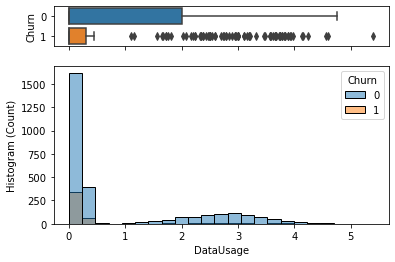

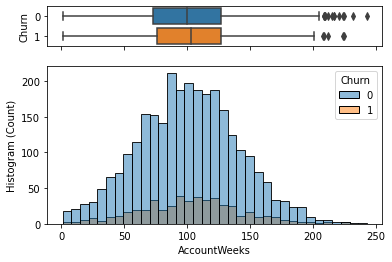

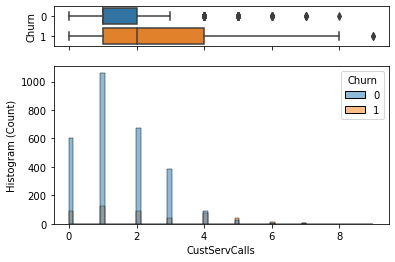

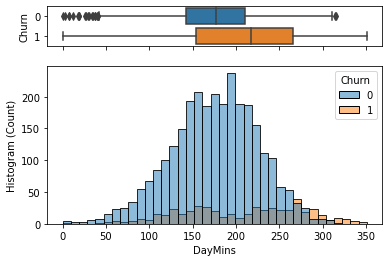

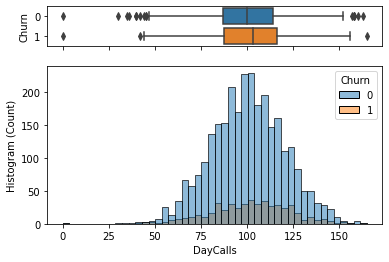

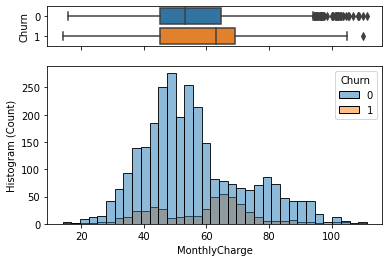

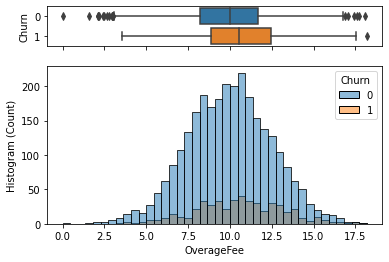

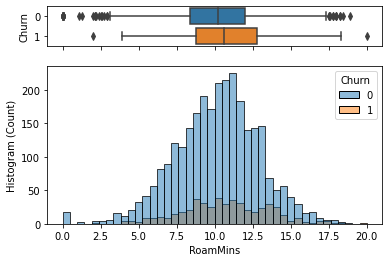

In [20]:
vis_univar(df,'DataUsage')
vis_univar(df,'AccountWeeks')
vis_univar(df,'CustServCalls') 
vis_univar(df,'DayMins')
vis_univar(df,'DayCalls')
vis_univar(df,'MonthlyCharge')
vis_univar(df,'OverageFee')
vis_univar(df,'RoamMins')

array([[<AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

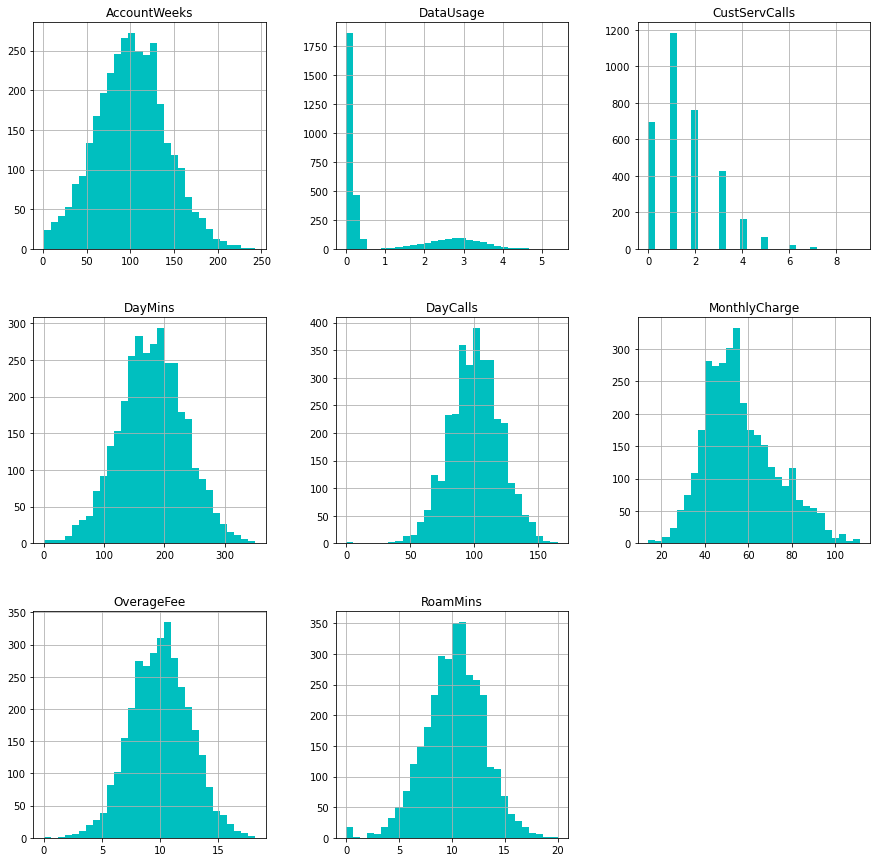

In [21]:
df.hist(figsize=(15,15), bins=30, color='c')

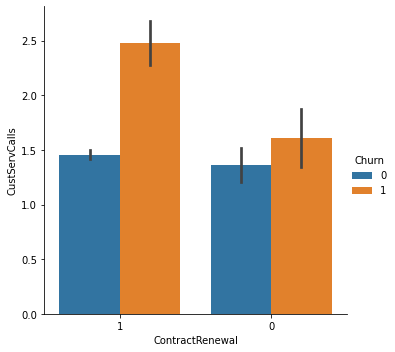

In [22]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

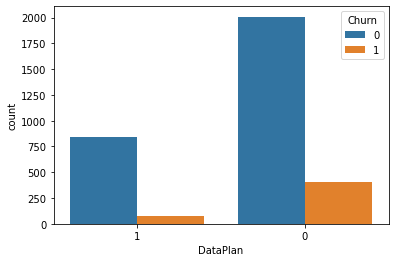

In [23]:
fig = plt.figure()
sns.countplot(data = df, x='DataPlan', hue = 'Churn')
plt.show() 

In [24]:
#Semakin tidak memiliki data plan maka semakin tinggi kemungkinan untuk Churn

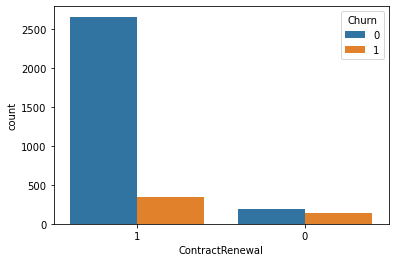

In [25]:
fig = plt.figure()
sns.countplot(data = df, x='ContractRenewal', hue = 'Churn')
plt.show() 

In [26]:
# Pada contract renewal Perbedaan tidak signifikan sehingga tidak terlalu mempengaruhi Churn

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   object 
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   object 
 3   DataPlan         3333 non-null   object 
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 286.6+ KB


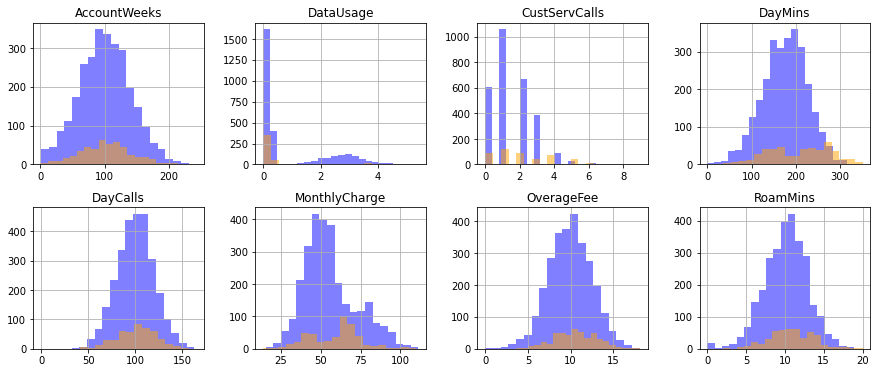

In [28]:
#membuat distribution diagram untuk 3 variabel numerik berikut 
numerical_features = ['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
#gunakan code berikut ini untuk memplot 2 lapisan untuk membedakan mana yang Churn (orange) atau Tidak (blue) 
df[df.Churn == '0'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == '1'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()


Pada histogram di atas dapat diketahui bahwa, untuk feature 
AccountWeeks, DataUsage, CustServCalls, DayCalls terlihat tidak ada kecenderungan apapun terhadap Churn.
Semakin kecil MonthlyCharge, Overage fee, Day mins, dan Roam Mins semakin kecil kecenderungan untuk Churn



Kemungkinan besar customer churn dikarenakan biaya perbulan dan biaya tambahan terlalu mahal untuk customer atau ada yang lebih murah dari yang ditawarkan oleh perusahaan telekom, maka dari itu rekomendasi untuk perusahaan agar customer churn menurun adalah dengan memberi diskon atau gift kepada pelanggan yang telah menggunakan rata-rata 100 menit/hari  

### Clasification

In [29]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

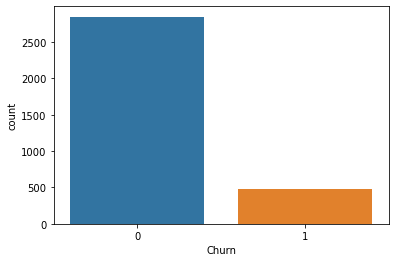

In [30]:
import seaborn as sns
sns.countplot(df["Churn"])

data diatas imbalance

In [31]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']=="0")] 
df_minority = df[(df['Churn']=="1")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2850, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [32]:
df_upsampled["Churn"].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

In [33]:
df["Churn"] = df["Churn"].astype("int")
df["ContractRenewal"] = df["ContractRenewal"].astype("int")
df["DataPlan"] = df["DataPlan"].astype("int")


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int32  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int32  
 3   DataPlan         3333 non-null   int32  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int32(3), int64(3)
memory usage: 247.5 KB


In [35]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [36]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [37]:
# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# decision tree

In [40]:
from sklearn import tree
#import pydotplus
#import matplotlib.pyplot as plt
#import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [41]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_4 <= 3.50
|   |--- feature_5 <= 247.45
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_9 <= 12.85
|   |   |   |   |--- feature_5 <= 223.45
|   |   |   |   |   |--- feature_6 <= 57.50
|   |   |   |   |   |   |--- feature_4 <= 2.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  57.50
|   |   |   |   |   |   |--- feature_9 <= 5.65
|   |   |   |   |   |   |   |--- feature_9 <= 3.85
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  3.85
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  5.65
|   |   |   |   |   |   |   |--- feature_8 <= 13.84
|   |   |   |   |   |   |   |   |--- feature_8 <= 10.63
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 10.57
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 118.00
|   |   |   |   |   |   |   |   |   |   |   |--- trun

In [42]:
# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [44]:
# Hyperparameter Tuning

In [45]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [46]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [47]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [48]:
grid_search.best_score_

0.9339709418837676

In [49]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [50]:
# Evaluation

In [51]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

0.8440779610194903
0.863568215892054
0.9332833583208395


Accuracy paling bagus Random forest

In [53]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.6464896385094322
0.7312362311472631
0.9080740117746005


precesion paling bagus Random Forest

In [54]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.5560668302745767
0.7426598733817044
0.8127845354958031


In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

[[1097   39]
 [ 169   29]]
[[1039   97]
 [  85  113]]
[[1118   18]
 [  71  127]]


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

model performance paling bagus Random Forest

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1136
           1       0.43      0.15      0.22       198

    accuracy                           0.84      1334
   macro avg       0.65      0.56      0.57      1334
weighted avg       0.80      0.84      0.81      1334

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1136
           1       0.53      0.57      0.55       198

    accuracy                           0.86      1334
   macro avg       0.73      0.74      0.73      1334
weighted avg       0.87      0.86      0.86      1334

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1136
           1       0.88      0.64      0.74       198

    accuracy                           0.93      1334
   macro avg       0.91      0.81      0.85      1334
weighted avg       0.93      0.93      0.93      1334



##### Conculsion
Random Forest lebih bagus